<a href="https://colab.research.google.com/github/joannejuneie/Prediction_of_heat_flux/blob/main/Heat_flux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the csv file
data_linear=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/April-June_22.csv")
df=pd.DataFrame(data_linear)
print(df.shape)

(1602047, 54)


In [ ]:
#deleting columns that are not required for training
to_drop=['MOULD_WATER_TEMP_BACK','MOULD_WATER_TEMP_NORTH', 'MOULD_WATER_TEMP_SOUTH','MOULD_WATER_BACK','MOULD_WATER_SOUTH','MOULD_WATER_NORTH','MOULD_BACK_HEATLOSS','MOULD_SOUTH_HEATLOSS','MOULD_NORTH_HEATLOSS']
df.drop(to_drop, inplace=True, axis=1)


In [ ]:
print(df.shape)


(1602047, 45)


In [ ]:
#checking for null tuples
df.isnull().sum()

DATA_TIME                           0
CAP_OFF_MODE                        0
CAST_ID                             0
GRADE                               0
CARBON                              0
VANADIUM                         4852
TITANIUM                         4808
NIOBIUM                          4253
MANGANESE                           0
PHOSPHORUS                          0
SULPHUR                             0
SILICON                             0
TUNDISH_WEIGHT                      0
TUNDISH_TEMPERATURE                 0
CASTING_SPEED                       0
SLAB_WIDTH                          0
MOULD_LEVEL                         0
MOULD_WATER_FRONT                   0
MOULD_WATER_TEMP_FRONT              0
WATER_INLET_TEMP                    0
MOULD_FRONT_HEATLOSS                0
RING_NARROW_FACEA_WATER_FR_PV       0
RING_NARROW_FACEB_WATER_FR_PV       0
ZONE1A_WATER_FR_PV                  0
ZONE1B_WATER_FR_PV                  0
ZONE2_WATER_FR_PV                   0
ZONE3_WATER_

In [ ]:
#removin null tuples
df.dropna(axis=0,inplace=True,how='any')

In [ ]:
df.shape

(1597195, 45)

In [ ]:
df.isnull().sum()

DATA_TIME                        0
CAP_OFF_MODE                     0
CAST_ID                          0
GRADE                            0
CARBON                           0
VANADIUM                         0
TITANIUM                         0
NIOBIUM                          0
MANGANESE                        0
PHOSPHORUS                       0
SULPHUR                          0
SILICON                          0
TUNDISH_WEIGHT                   0
TUNDISH_TEMPERATURE              0
CASTING_SPEED                    0
SLAB_WIDTH                       0
MOULD_LEVEL                      0
MOULD_WATER_FRONT                0
MOULD_WATER_TEMP_FRONT           0
WATER_INLET_TEMP                 0
MOULD_FRONT_HEATLOSS             0
RING_NARROW_FACEA_WATER_FR_PV    0
RING_NARROW_FACEB_WATER_FR_PV    0
ZONE1A_WATER_FR_PV               0
ZONE1B_WATER_FR_PV               0
ZONE2_WATER_FR_PV                0
ZONE3_WATER_FR_PV                0
ZONE4I_WATER_FR_PV               0
ZONE4O_WATER_FR_PV  

In [ ]:
#checking for duplicate
df.duplicated().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1602042    False
1602043    False
1602044    False
1602045    False
1602046    False
Length: 1597195, dtype: bool>

In [ ]:
#removing duplicate values
df.drop_duplicates()

,DATA_TIME,CAP_OFF_MODE,CAST_ID,GRADE,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS
0,2022-03-27 09:44:57,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,25.568,2.116,6.097,0.772,82.962,0.013,5.647,1.504,7.708,40.0
1,2022-03-27 09:45:02,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,27.057,2.118,6.102,0.762,82.990,0.013,5.646,1.506,7.722,41.0
2,2022-03-27 09:45:07,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,26.496,2.119,6.104,0.771,82.890,0.013,5.646,1.504,7.702,41.0
3,2022-03-27 09:45:12,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,26.105,2.116,6.096,0.773,82.904,0.013,5.646,1.504,7.708,40.0
4,2022-03-27 09:45:17,0,74177,I17021,0.061,0.005,0.024,0.012,0.745,0.018,...,26.105,2.116,6.095,0.773,83.011,0.013,5.647,1.501,7.725,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602042,2022-06-29 05:59:34,0,80800,T01403,0.031,0.001,0.001,0.000,0.193,0.019,...,24.762,2.476,7.545,0.928,91.963,0.085,7.244,0.433,7.423,124.0
1602043,2022-06-29 05:59:39,0,80800,T01403,0.031,0.001,0.001,0.000,0.193,0.019,...,23.370,2.474,7.548,0.928,91.984,0.085,7.243,0.434,7.423,124.0
1602044,2022-06-29 05:59:44,0,80800,T01403,0.031,0.001,0.001,0.000,0.193,0.019,...,23.126,2.473,7.549,0.928,91.939,0.085,7.243,0.434,7.423,125.0
1602045,2022-06-29 05:59:49,0,80800,T01403,0.031,0.001,0.001,0.000,0.193,0.019,...,24.811,2.473,7.549,0.929,91.941,0.085,7.244,0.431,7.423,124.0


In [ ]:
#checking type of each attribute
df.dtypes

DATA_TIME                         object
CAP_OFF_MODE                       int64
CAST_ID                            int64
GRADE                             object
CARBON                           float64
VANADIUM                         float64
TITANIUM                         float64
NIOBIUM                          float64
MANGANESE                        float64
PHOSPHORUS                       float64
SULPHUR                          float64
SILICON                          float64
TUNDISH_WEIGHT                   float64
TUNDISH_TEMPERATURE              float64
CASTING_SPEED                    float64
SLAB_WIDTH                       float64
MOULD_LEVEL                      float64
MOULD_WATER_FRONT                float64
MOULD_WATER_TEMP_FRONT           float64
WATER_INLET_TEMP                 float64
MOULD_FRONT_HEATLOSS             float64
RING_NARROW_FACEA_WATER_FR_PV    float64
RING_NARROW_FACEB_WATER_FR_PV    float64
ZONE1A_WATER_FR_PV               float64
ZONE1B_WATER_FR_

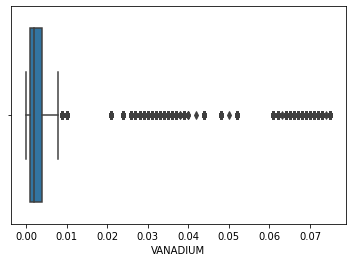

In [ ]:
#boxplot of an attribute
sns.boxplot(x=df['VANADIUM'])

In [ ]:
#dropping object type variable
to_drop=['DATA_TIME','GRADE']
df.drop(to_drop, inplace=True, axis=1)

In [ ]:
from scipy import stats
import numpy as np


In [ ]:
#Standardization technique zscore is used to sclae down values of each attribute, to give all values equal weightage
# finding the zscore of the Dataframe df and storing it to zscore_frame
from scipy.stats import zscore
zscore_frame = df.apply(zscore)
zscore_frame

,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS
0,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.193981,-0.054226,-0.002864,-0.047362,0.165273,-0.692477,-0.132861,2.062123,0.311353,-0.878499
1,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.350927,-0.051121,-0.000744,-0.072846,0.166345,-0.692477,-0.133351,2.067894,0.316908,-0.861679
2,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.291795,-0.049568,0.000105,-0.049911,0.162516,-0.692477,-0.133351,2.062123,0.308972,-0.861679
3,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.250583,-0.054226,-0.003289,-0.044814,0.163052,-0.692477,-0.133351,2.062123,0.311353,-0.878499
4,-0.237879,-1.635359,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,...,0.250583,-0.054226,-0.003713,-0.044814,0.167149,-0.692477,-0.132861,2.053466,0.318098,-0.861679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602042,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,0.109025,0.504672,0.611314,0.350177,0.509864,-0.414314,0.648359,-1.028441,0.198271,0.534341
1602043,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,-0.037697,0.501567,0.612586,0.350177,0.510668,-0.414314,0.647870,-1.025556,0.198271,0.534341
1602044,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,-0.063415,0.500015,0.613011,0.350177,0.508945,-0.414314,0.647870,-1.025556,0.198271,0.551160
1602045,-0.237879,1.670116,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,...,0.114190,0.500015,0.613011,0.352726,0.509022,-0.414314,0.648359,-1.034213,0.198271,0.534341


In [ ]:
#zscore with categorical variables are deleted
del zscore_frame['CAP_OFF_MODE']
del zscore_frame['CAST_ID']

In [ ]:
#assigning the castid and capoff mode of df to zscore_frame
zscore_frame['CAST_ID']=df['CAST_ID']
zscore_frame['CAP_OFF_MODE']=df['CAP_OFF_MODE']


In [ ]:
zscore_frame

,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,TUNDISH_WEIGHT,TUNDISH_TEMPERATURE,...,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS,CAST_ID,CAP_OFF_MODE
0,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.571650,-0.305677,...,-0.002864,-0.047362,0.165273,-0.692477,-0.132861,2.062123,0.311353,-0.878499,74177,0
1,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.573012,-0.305677,...,-0.000744,-0.072846,0.166345,-0.692477,-0.133351,2.067894,0.316908,-0.861679,74177,0
2,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.571650,-0.305677,...,0.000105,-0.049911,0.162516,-0.692477,-0.133351,2.062123,0.308972,-0.861679,74177,0
3,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.567564,-0.305677,...,-0.003289,-0.044814,0.163052,-0.692477,-0.133351,2.062123,0.311353,-0.878499,74177,0
4,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.563478,-0.305677,...,-0.003713,-0.044814,0.167149,-0.692477,-0.132861,2.053466,0.318098,-0.861679,74177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602042,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,0.454515,0.914570,...,0.611314,0.350177,0.509864,-0.414314,0.648359,-1.028441,0.198271,0.534341,80800,0
1602043,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,0.454515,0.914570,...,0.612586,0.350177,0.510668,-0.414314,0.647870,-1.025556,0.198271,0.534341,80800,0
1602044,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,0.454515,0.914570,...,0.613011,0.350177,0.508945,-0.414314,0.647870,-1.025556,0.198271,0.551160,80800,0
1602045,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,0.454515,0.914570,...,0.613011,0.352726,0.509022,-0.414314,0.648359,-1.034213,0.198271,0.534341,80800,0


In [ ]:

# for col in df:
#     if col.endswith('zscore'):
#         df.drop(col, inplace=True, axis=1)   

In [ ]:
# for col in df:
#       if(col!='CAP_OFF_MODE' or col!='CAST_ID'):
#         col_zscore = col + '_zscore'
#         df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
        


In [ ]:
# for col in df:
#  if col.endswith('zscore'):
    

In [ ]:
# df_z


In [ ]:
#taking zscore values less than 3 for training
# all zscore values greater than absolute 3 removed
from scipy import stats
zscore_removed= zscore_frame[(np.abs(stats.zscore(zscore_frame)) < 3).all(axis=1)]
zscore_removed

,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,TUNDISH_WEIGHT,TUNDISH_TEMPERATURE,...,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS,CAST_ID,CAP_OFF_MODE
0,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.571650,-0.305677,...,-0.002864,-0.047362,0.165273,-0.692477,-0.132861,2.062123,0.311353,-0.878499,74177,0
1,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.573012,-0.305677,...,-0.000744,-0.072846,0.166345,-0.692477,-0.133351,2.067894,0.316908,-0.861679,74177,0
2,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.571650,-0.305677,...,0.000105,-0.049911,0.162516,-0.692477,-0.133351,2.062123,0.308972,-0.861679,74177,0
3,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.567564,-0.305677,...,-0.003289,-0.044814,0.163052,-0.692477,-0.133351,2.062123,0.311353,-0.878499,74177,0
4,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.563478,-0.305677,...,-0.003713,-0.044814,0.167149,-0.692477,-0.132861,2.053466,0.318098,-0.861679,74177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602042,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,0.454515,0.914570,...,0.611314,0.350177,0.509864,-0.414314,0.648359,-1.028441,0.198271,0.534341,80800,0
1602043,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,0.454515,0.914570,...,0.612586,0.350177,0.510668,-0.414314,0.647870,-1.025556,0.198271,0.534341,80800,0
1602044,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,0.454515,0.914570,...,0.613011,0.350177,0.508945,-0.414314,0.647870,-1.025556,0.198271,0.551160,80800,0
1602045,-0.530790,-0.350943,-0.348699,-0.646761,-1.415061,0.067568,1.859681,-0.479591,0.454515,0.914570,...,0.613011,0.352726,0.509022,-0.414314,0.648359,-1.034213,0.198271,0.534341,80800,0


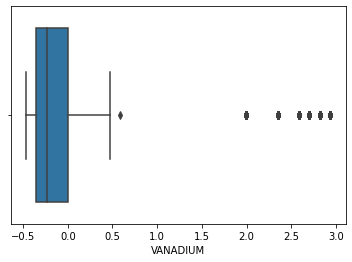

In [ ]:
sns.boxplot(x=zscore_removed['VANADIUM'])


In [ ]:
#separating into dependent and independent variables
Y = df['MOULD_FRONT_HEATLOSS']
X = zscore_removed.drop('MOULD_FRONT_HEATLOSS', axis=1)

In [ ]:
# Splitting dataset into 80% Training and 20% Testing Data without shuffling:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0,shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression
ml= LinearRegression()


In [ ]:
X_train

,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,TUNDISH_WEIGHT,TUNDISH_TEMPERATURE,...,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS,CAST_ID,CAP_OFF_MODE
0,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.571650,-0.305677,...,-0.002864,-0.047362,0.165273,-0.692477,-0.132861,2.062123,0.311353,-0.878499,74177,0
1,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.573012,-0.305677,...,-0.000744,-0.072846,0.166345,-0.692477,-0.133351,2.067894,0.316908,-0.861679,74177,0
2,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.571650,-0.305677,...,0.000105,-0.049911,0.162516,-0.692477,-0.133351,2.062123,0.308972,-0.861679,74177,0
3,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.567564,-0.305677,...,-0.003289,-0.044814,0.163052,-0.692477,-0.133351,2.062123,0.311353,-0.878499,74177,0
4,-0.309795,0.118613,2.324577,0.419442,0.075422,-0.060270,-0.480442,0.083992,0.563478,-0.305677,...,-0.003713,-0.044814,0.167149,-0.692477,-0.132861,2.053466,0.318098,-0.861679,74177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199665,0.272156,0.118613,1.394742,1.396795,0.888168,-0.699459,-0.012417,-0.468319,0.722836,-0.693937,...,0.228301,0.398596,0.511013,0.199963,0.404258,0.509627,0.539897,0.837092,79113,0
1199666,0.272156,0.118613,1.394742,1.396795,0.888168,-0.699459,-0.012417,-0.468319,0.725560,-0.693937,...,0.232118,0.396047,0.520201,0.199963,0.404258,0.498084,0.543468,0.837092,79113,0
1199667,0.272156,0.118613,1.394742,1.396795,0.888168,-0.699459,-0.012417,-0.468319,0.726922,-0.693937,...,0.227877,0.396047,0.519818,0.203827,0.404258,0.500969,0.539500,0.837092,79113,0
1199668,0.272156,0.118613,1.394742,1.396795,0.888168,-0.699459,-0.012417,-0.468319,0.728284,-0.693937,...,0.227877,0.396047,0.505385,0.203827,0.404258,0.500969,0.539500,0.837092,79113,0


In [ ]:
ml.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(X_test)
print(y_pred)

[0.29498911 0.34900746 0.33278925 ... 0.16941316 0.16412151 0.18892311]


In [ ]:
#independent factors
row_1=X.iloc[0]
#original row
row_df=df.iloc[0]
#independent factors and dependent factors
row_2=zscore_removed.iloc[0]

In [ ]:
row_df

CAP_OFF_MODE                          0.0000
CAST_ID                           74177.0000
CARBON                                0.0610
VANADIUM                              0.0050
TITANIUM                              0.0240
NIOBIUM                               0.0120
MANGANESE                             0.7450
PHOSPHORUS                            0.0180
SULPHUR                               0.0050
SILICON                               0.0630
TUNDISH_WEIGHT                       32.2000
TUNDISH_TEMPERATURE                1547.0000
CASTING_SPEED                         1.4010
SLAB_WIDTH                         1335.0000
MOULD_LEVEL                          29.2500
MOULD_WATER_FRONT                  4015.7570
MOULD_WATER_TEMP_FRONT               48.2481
WATER_INLET_TEMP                     40.5313
MOULD_FRONT_HEATLOSS                  1.7397
RING_NARROW_FACEA_WATER_FR_PV        78.6914
RING_NARROW_FACEB_WATER_FR_PV       480.0790
ZONE1A_WATER_FR_PV                 1371.8450
ZONE1B_WAT

In [ ]:
row_2

CARBON                              -0.309795
VANADIUM                             0.118613
TITANIUM                             2.324577
NIOBIUM                              0.419442
MANGANESE                            0.075422
PHOSPHORUS                          -0.060270
SULPHUR                             -0.480442
SILICON                              0.083992
TUNDISH_WEIGHT                       0.571650
TUNDISH_TEMPERATURE                 -0.305677
CASTING_SPEED                        0.723136
SLAB_WIDTH                           0.390697
MOULD_LEVEL                          0.441601
MOULD_WATER_FRONT                    0.788963
MOULD_WATER_TEMP_FRONT               0.276476
WATER_INLET_TEMP                     0.086773
MOULD_FRONT_HEATLOSS                 0.806190
RING_NARROW_FACEA_WATER_FR_PV        1.009009
RING_NARROW_FACEB_WATER_FR_PV        1.138410
ZONE1A_WATER_FR_PV                   1.814132
ZONE1B_WATER_FR_PV                   1.776376
ZONE2_WATER_FR_PV                 

In [ ]:

row_1

CARBON                              -0.309795
VANADIUM                             0.118613
TITANIUM                             2.324577
NIOBIUM                              0.419442
MANGANESE                            0.075422
PHOSPHORUS                          -0.060270
SULPHUR                             -0.480442
SILICON                              0.083992
TUNDISH_WEIGHT                       0.571650
TUNDISH_TEMPERATURE                 -0.305677
CASTING_SPEED                        0.723136
SLAB_WIDTH                           0.390697
MOULD_LEVEL                          0.441601
MOULD_WATER_FRONT                    0.788963
MOULD_WATER_TEMP_FRONT               0.276476
WATER_INLET_TEMP                     0.086773
RING_NARROW_FACEA_WATER_FR_PV        1.009009
RING_NARROW_FACEB_WATER_FR_PV        1.138410
ZONE1A_WATER_FR_PV                   1.814132
ZONE1B_WATER_FR_PV                   1.776376
ZONE2_WATER_FR_PV                    0.952495
ZONE3_WATER_FR_PV                 

In [ ]:
predicted_zscore=ml.predict([row_1])
predicted_value=df['MOULD_FRONT_HEATLOSS'].std(ddof=0)*predicted_zscore+df['MOULD_FRONT_HEATLOSS'].mean()
predicted_value

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.74645673])

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9588497394407692

Text(0.5, 1.0, 'Actual vs. Predicted')

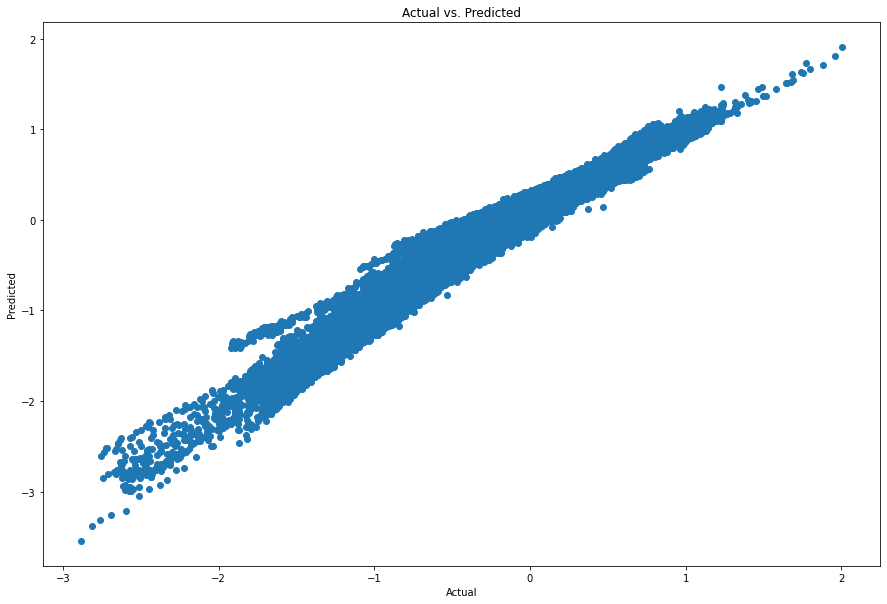

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')